In [1]:
# -*- coding: utf-8 -*-
"""
iris数据机器学习分类
isis鸢尾花数据集
iris是鸢尾植物，这里存储了其萼片和花瓣的长宽，共4个属性，鸢尾植物分三类。
该数据集一共有150个样本,包含4个特征变量，1个类别变量(划分为3类（0类、1类、2类）。
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.datasets import load_iris
iris = load_iris()

#print(iris.keys())
#print(iris.feature_names)
#print(iris.target_names)
#print(iris.DESCR)


In [2]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [3]:
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns = iris.feature_names)
df['Species'] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


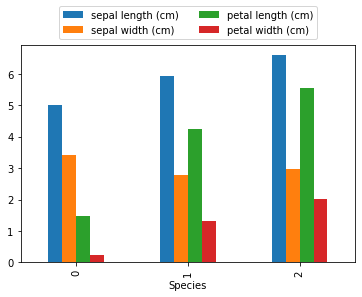

In [4]:
#条状图显示组平均数，可以从图上看出不同的花种类中，他们的属性特点。
grouped_data=df.groupby("Species")
#用不同的花的类别分成不同的组，此数据为三组
group_mean=grouped_data.mean()
#求组平均值
group_mean.plot(kind="bar")
plt.legend(loc="upper center",bbox_to_anchor=(0.5,1.2),ncol=2)
plt.show()
#画图

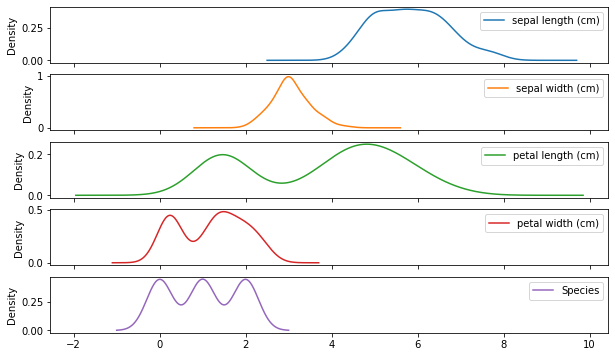

In [5]:
#画kde图
df.plot(kind="kde",subplots=True,figsize=(10,6))
plt.show()

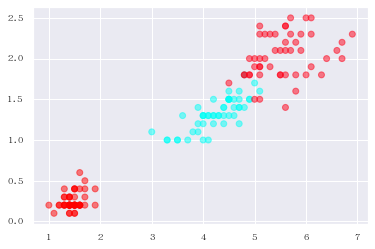

In [198]:
#df.plot(x='sepal length (cm)', y='sepal width (cm)', kind='scatter',c="Species")
#plt.show()

plt.scatter(df['petal length (cm)'],df['petal width (cm)'],c=df['Species'],cmap='hsv',alpha=0.5)
 
plt.show()

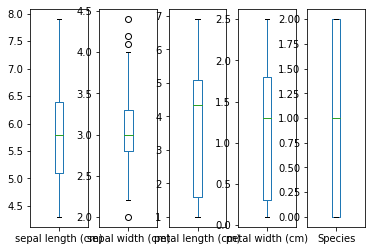

In [7]:
df.plot(kind='box', subplots=True, sharex=False, sharey=False)
plt.show()

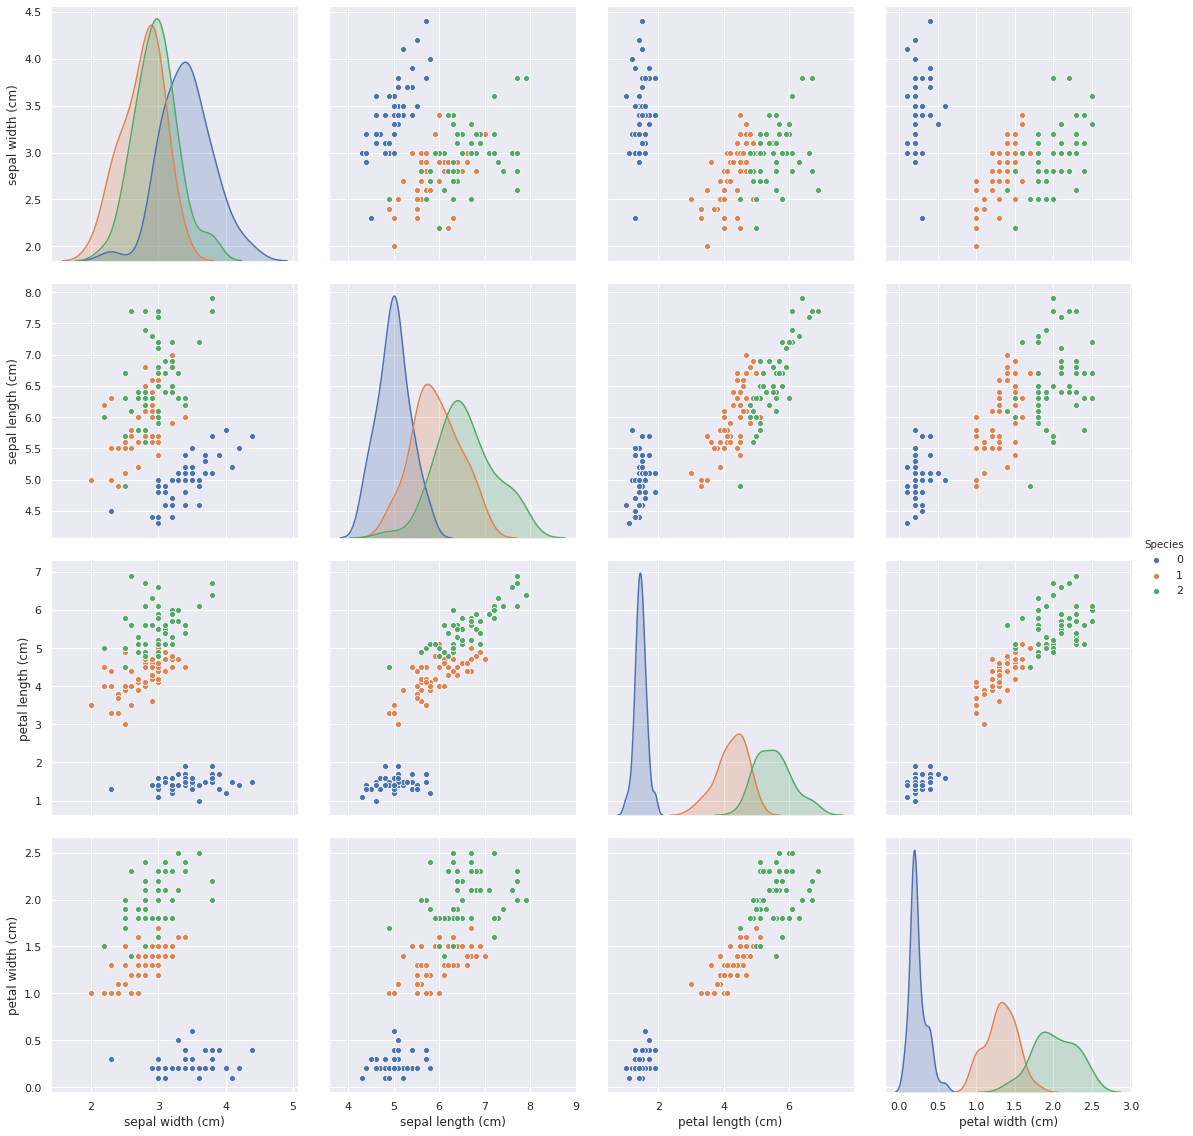

In [8]:
import seaborn as sns
sns.set()           
sns.pairplot(df,vars=["sepal width (cm)", "sepal length (cm)","petal length (cm)","petal width (cm)"],hue='Species',height=4)  
plt.show()

In [405]:
#为了追求机器学习和最优化算法的最佳性能，我们将特征缩放
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X) 
X_std = std.transform(X)
#进行数据分割，测试数据占20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y,test_size=0.4, random_state= 0)

train accuracy: 0.900
test accuracy: 0.850


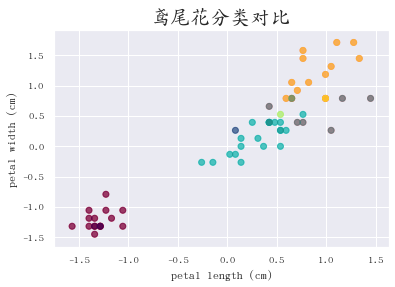

In [410]:
"""
感知机（perceptron）是二类分类的线性分类模型，其输入为实例的特征向量，输出为实例的类别。
感知机对应于输入空间（特征空间）中将实例划分为正负两类的分离超平面。
"""
from sklearn.linear_model import Perceptron
clf= Perceptron(eta0=0.1)
clf.fit(X_train, y_train)
print('train accuracy: %.3f' % clf.score(X_train, y_train))
print('test accuracy: %.3f' % clf.score(X_test, y_test))
y_test_pred = clf.predict(X_test) 
xf = pd.DataFrame(X_test, columns = iris.feature_names)
xf['Species'] = y_test
xf['pred']=y_test_pred
xf.head()
#xf.plot(x='petal length (cm)', y='petal width (cm)',kind='scatter',c="Species")
#xf.plot(x='petal length (cm)', y='petal width (cm)', kind='scatter',c="pred")
#plt.show()    

plt.title(u'鸢尾花分类对比', fontsize=20)
plt.scatter(xf['petal length (cm)'],xf['petal width (cm)'],c=xf['Species'],cmap='hsv',alpha=0.5)
plt.scatter(xf['petal length (cm)'],xf['petal width (cm)'],c=xf['pred'],cmap='viridis',alpha=0.5)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

best-parameters:{'eta0': 0.01}
mean-score:0.9111111111111111
train accuracy: 0.900
test accuracy: 0.850


/home/yakeworld/.julia/conda/3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


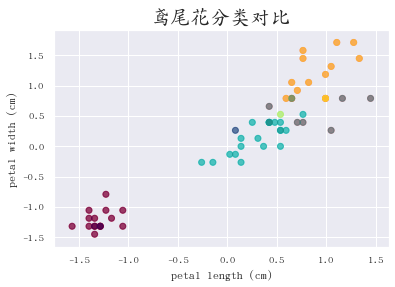

In [411]:

#https://github.com/seven0525/Kaggle/blob/0800179136c04dd9f0dc920c7ca9ee9bc70f0749/models/classifications/.ipynb_checkpoints/%E3%83%91%E3%83%BC%E3%82%BB%E3%83%97%E3%83%88%E3%83%AD%E3%83%B3-checkpoint.ipynb
param_grid = {'eta0': [0.001, 0.01, 0.1, 0.5, 1]}
from sklearn.model_selection import StratifiedKFold
kf_5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
from sklearn.model_selection import GridSearchCV
#from sklearn.svm import SVC
clf = GridSearchCV(Perceptron(), param_grid, cv=kf_5)
clf.fit(X_train, y_train)
print("best-parameters:{}".format(clf.best_params_))
print("mean-score:{}".format(clf.best_score_))
print('train accuracy: %.3f' % clf.score(X_train, y_train))
print('test accuracy: %.3f' % clf.score(X_test, y_test))

y_test_pred = clf.predict(X_test)
xf = pd.DataFrame(X_test, columns = iris.feature_names)
xf['Species'] = y_test
xf['pred']=y_test_pred
xf.head()
#xf.plot(x='petal length (cm)', y='petal width (cm)',kind='scatter',c="Species")
#xf.plot(x='petal length (cm)', y='petal width (cm)', kind='scatter',c="pred")
#plt.show()
plt.title(u'鸢尾花分类对比', fontsize=20)
plt.scatter(xf['petal length (cm)'],xf['petal width (cm)'],c=xf['Species'],cmap='hsv',alpha=0.5)
plt.scatter(xf['petal length (cm)'],xf['petal width (cm)'],c=xf['pred'],cmap='viridis',alpha=0.5)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

train accuracy: 1.000
test accuracy: 0.967


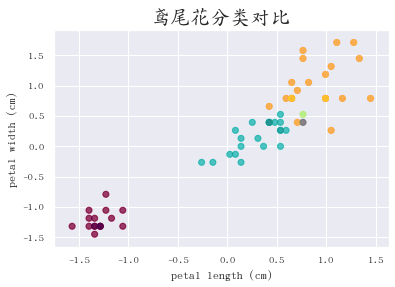

In [428]:
clf = LogisticRegression(solver='lbfgs', multi_class='multinomial',C=1000.0)
clf.fit(X_train,y_train)
print('train accuracy: %.3f' % clf.score(X_train, y_train))
print('test accuracy: %.3f' % clf.score(X_test, y_test))
#print('accuracy:%.2f'%metrics.accuracy_score(y_test, y_test_pred))
#print('confusion matirx:\n', metrics.confusion_matrix(y_test, y_test_pred))
y_test_pred = clf.predict(X_test)
xf = pd.DataFrame(X_test, columns = iris.feature_names)
xf['Species'] = y_test
xf['pred']=y_test_pred
xf.head()
#xf.plot(x='petal length (cm)', y='petal width (cm)',kind='scatter',c="Species")
#xf.plot(x='petal length (cm)', y='petal width (cm)', kind='scatter',c="pred")
#plt.show()
plt.title(u'鸢尾花分类对比', fontsize=20)
plt.scatter(xf['petal length (cm)'],xf['petal width (cm)'],c=xf['Species'],cmap='hsv',alpha=0.5)
plt.scatter(xf['petal length (cm)'],xf['petal width (cm)'],c=xf['pred'],cmap='viridis',alpha=0.5)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

train accuracy: 0.978
test accuracy: 0.933


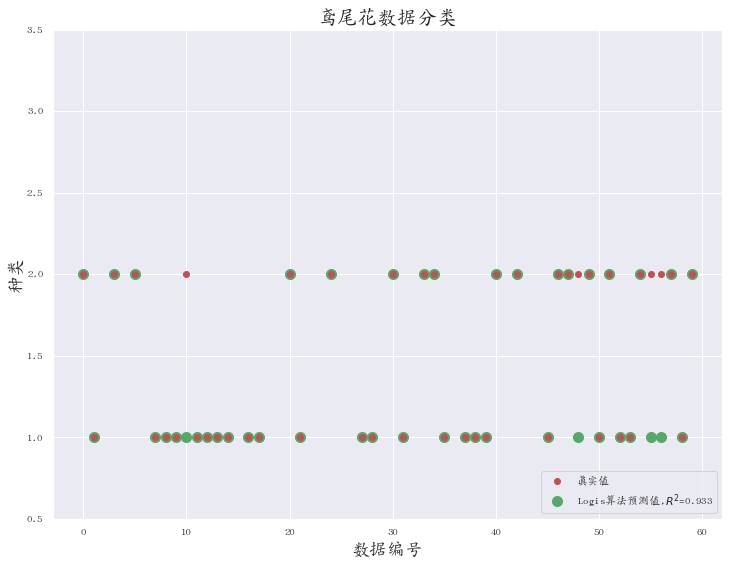

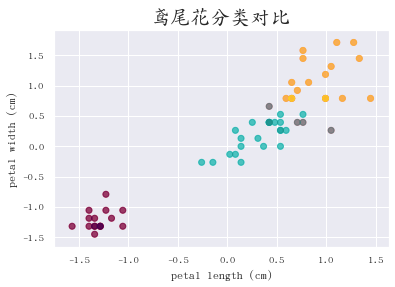

In [442]:
"""
在scikit-learn中，与逻辑回归有关的主要是这3个类。
LogisticRegression， LogisticRegressionCV 和logistic_regression_path。
其中LogisticRegression和LogisticRegressionCV的主要区别是LogisticRegressionCV使用了交叉验证来选择正则化系数C。
而LogisticRegression需要自己每次指定一个正则化系数。除了交叉验证，以及选择正则化系数C以外，
LogisticRegression和LogisticRegressionCV的使用方法基本相同。

"""
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y,test_size=0.4, random_state= 0)
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=3,solver='lbfgs',multi_class='multinomial')
#solver：‘newton-cg’,'lbfgs','liblinear','sag'  default:liblinear
#'sag'=mini-batch
#'multi_clss':
clf.fit(X_train, y_train)
print('train accuracy: %.3f' % clf.score(X_train, y_train))
print('test accuracy: %.3f' % clf.score(X_test, y_test))
#print('accuracy:%.2f'%metrics.accuracy_score(y_test, y_test_pred))
#from pylab import mpl

y_test_pred = clf.predict(X_test)
plt.rcParams['font.sans-serif']=['AR PL UKai CN']
plt.rcParams['axes.unicode_minus']=False
x_test_len = range(len(X_test))
plt.figure(figsize=(12, 9), facecolor='w')
plt.ylim(0.5,3.5)
plt.plot(x_test_len, y_test, 'ro',markersize = 6, 
  zorder=3, label=u'真实值')
plt.plot(x_test_len, y_test_pred, 'go', markersize = 10, zorder=2,
         label=u'Logis算法预测值,$R^2$=%.3f' % model.score(X_test, y_test))
plt.legend(loc = 'lower right')
plt.xlabel(u'数据编号', fontsize=18)
plt.ylabel(u'种类', fontsize=18)
plt.title(u'鸢尾花数据分类', fontsize=20)
plt.show()

xf = pd.DataFrame(X_test, columns = iris.feature_names)
xf['Species'] = y_test
xf['pred']=y_test_pred
xf.head()
#xf.plot(x='petal length (cm)', y='petal width (cm)',kind='scatter',c="Species")
#xf.plot(x='petal length (cm)', y='petal width (cm)', kind='scatter',c="pred")
#plt.show()

plt.title(u'鸢尾花分类对比', fontsize=20)
plt.scatter(xf['petal length (cm)'],xf['petal width (cm)'],c=xf['Species'],cmap='hsv',alpha=0.5)
plt.scatter(xf['petal length (cm)'],xf['petal width (cm)'],c=xf['pred'],cmap='viridis',alpha=0.5)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

In [98]:
# 设置字符集，防止中文乱码
"""
from matplotlib.font_manager import FontManager
import subprocess
 
fm = FontManager()
mat_fonts = set(f.name for f in fm.ttflist)
print (mat_fonts)
output = subprocess.check_output('fc-list :lang=zh -f "%{family}\n"', shell=True)
print ('*' * 10, '系统可用的中文字体', '*' * 10)
print (output)
zh_fonts = set(f.split(',', 1)[0] for f in output.decode().split('\n'))
available = mat_fonts & zh_fonts
print ('*' * 10, '可用的字体', '*' * 10)
for f in available:
    print(f)

"""

'\nfrom matplotlib.font_manager import FontManager\nimport subprocess\n \nfm = FontManager()\nmat_fonts = set(f.name for f in fm.ttflist)\nprint (mat_fonts)\noutput = subprocess.check_output(\'fc-list :lang=zh -f "%{family}\n"\', shell=True)\nprint (\'*\' * 10, \'系统可用的中文字体\', \'*\' * 10)\nprint (output)\nzh_fonts = set(f.split(\',\', 1)[0] for f in output.decode().split(\'\n\'))\navailable = mat_fonts & zh_fonts\nprint (\'*\' * 10, \'可用的字体\', \'*\' * 10)\nfor f in available:\n    print(f)\n\n'

train accuracy: 1.000
test accuracy: 0.950


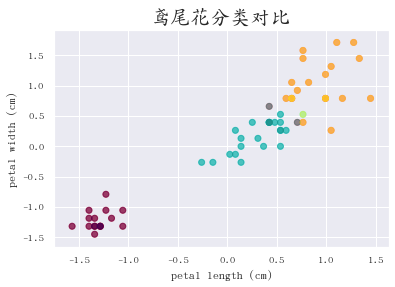

'tree.pdf'

In [443]:
"""
class sklearn.tree.DecisionTreeClassifier(criterion=’gini’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)

"""
from sklearn import tree
import graphviz
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y,test_size=0.4, random_state= 0)
from sklearn.tree import DecisionTreeClassifier  
clf = DecisionTreeClassifier()  
clf.fit(X_train, y_train)  
#print(clf)   
print('train accuracy: %.3f' % clf.score(X_train, y_train))
print('test accuracy: %.3f' % clf.score(X_test, y_test))
y_test_pred = clf.predict(X_test)  
#print(y_test_pred)
#from sklearn import metrics
#print('Accuracy:%.2f'%metrics.accuracy_score(y_test, y_test_pred))
xf = pd.DataFrame(X_test, columns = iris.feature_names)
xf['Species'] = y_test
xf['pred']=y_test_pred
xf.head()
#xf.plot(x='petal length (cm)', y='petal width (cm)',kind='scatter',c="Species")
#xf.plot(x='petal length (cm)', y='petal width (cm)', kind='scatter',c="pred")
#plt.show()
plt.title(u'鸢尾花分类对比', fontsize=20)
plt.scatter(xf['petal length (cm)'],xf['petal width (cm)'],c=xf['Species'],cmap='hsv',alpha=0.5)
plt.scatter(xf['petal length (cm)'],xf['petal width (cm)'],c=xf['pred'],cmap='viridis',alpha=0.5)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()
dot_data=tree.export_graphviz(clf)
graph = graphviz.Source(dot_data) 
graph.render("tree")


train accuracy: 1.000
test accuracy: 0.933


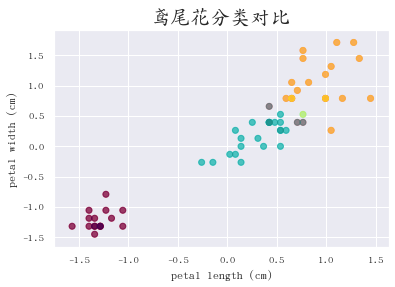

In [454]:
#K近邻法(k-nearest neighbors,KNN)是一种很基本的机器学习方法了，在我们平常的生活中也会不自主的应用。
"""
class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30,
p=2, metric=’minkowski’, metric_params=None, n_jobs=None, **kwargs)[source]
n_neighbors： 选择最邻近点的数目k
weights： 邻近点的计算权重值，uniform代表各个点权重值相等
algorithm： 寻找最邻近点使用的算法
leaf_size： 传递给BallTree或kTree的叶子大小，这会影响构造和查询的速度，以及存储树所需的内存。
p： Minkowski度量的指数参数。p = 1 代表使用曼哈顿距离 (l1)，p = 2 代表使用欧几里得距离(l2)，
metric： 距离度量，点之间距离的计算方法。
metric_params： 额外的关键字度量函数。
n_jobs： 为邻近点搜索运行的并行作业数。
"""
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
#acc = knn.score(X_test,y_test)
#print('Accuracy:%.2f'%acc)
print('train accuracy: %.3f' % clf.score(X_train, y_train))
print('test accuracy: %.3f' % clf.score(X_test, y_test))
y_test_pred = clf.predict(X_test)
#print('Accuracy:%.2f'%metrics.accuracy_score(y_test, y_test_pred))

xf = pd.DataFrame(X_test, columns = iris.feature_names)
xf['Species'] = y_test
xf['pred']=y_test_pred
xf.head()
#xf.plot(x='petal length (cm)', y='petal width (cm)',kind='scatter',c="Species")
#xf.plot(x='petal length (cm)', y='petal width (cm)', kind='scatter',c="pred")
#plt.show()
plt.title(u'鸢尾花分类对比', fontsize=20)
plt.scatter(xf['petal length (cm)'],xf['petal width (cm)'],c=xf['Species'],cmap='hsv',alpha=0.5)
plt.scatter(xf['petal length (cm)'],xf['petal width (cm)'],c=xf['pred'],cmap='viridis',alpha=0.5)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

train accuracy: 0.978
test accuracy: 0.933


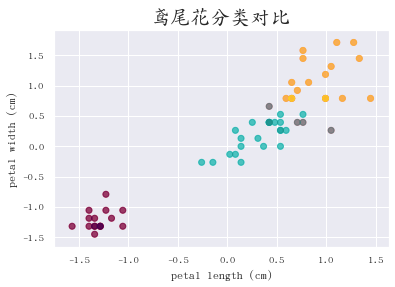

In [231]:
#用sklearn的朴素贝叶斯 训练数据集
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(X_train,y_train)
#acc = gnb.score(X_test,y_test)
#print('Accuracy:%.2f'%acc)
print('train accuracy: %.3f' % clf.score(X_train, y_train))
print('test accuracy: %.3f' % clf.score(X_test, y_test))

y_test_pred = clf.predict(X_test)
xf = pd.DataFrame(X_test, columns = iris.feature_names)
xf['Species'] = y_test
xf['pred']=y_test_pred
xf.head()
#xf.plot(x='petal length (cm)', y='petal width (cm)',kind='scatter',c="Species")
#xf.plot(x='petal length (cm)', y='petal width (cm)', kind='scatter',c="pred")
#plt.show()

plt.title(u'鸢尾花分类对比', fontsize=20)
plt.scatter(xf['petal length (cm)'],xf['petal width (cm)'],c=xf['Species'],cmap='hsv',alpha=0.5)
plt.scatter(xf['petal length (cm)'],xf['petal width (cm)'],c=xf['pred'],cmap='viridis',alpha=0.5)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()


 

/home/yakeworld/.julia/conda/3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


train accuracy: 0.978
test accuracy: 0.933


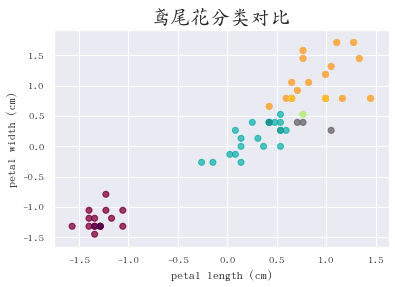

In [232]:
"""
支持向量机（Support Vector Machine, SVM）是一类按监督学习（supervised learning）方式对数据进行二元分类（binary classification）
的广义线性分类器（generalized linear classifier），其决策边界是对学习样本求解的最大边距超平面（maximum-margin hyperplane）
"""
from sklearn import svm
clf=svm.SVC()
clf.fit(X_train,y_train)
#acc = clf.score(X_test,y_test)
#print('Accuracy:%.2f'%acc)
print('train accuracy: %.3f' % clf.score(X_train, y_train))
print('test accuracy: %.3f' % clf.score(X_test, y_test))

y_test_pred = clf.predict(X_test)
xf = pd.DataFrame(X_test, columns = iris.feature_names)
xf['Species'] = y_test
xf['pred']=y_test_pred
xf.head()
#xf.plot(x='petal length (cm)', y='petal width (cm)',kind='scatter',c="Species")
#xf.plot(x='petal length (cm)', y='petal width (cm)', kind='scatter',c="pred")
#plt.show()
plt.title(u'鸢尾花分类对比', fontsize=20)
plt.scatter(xf['petal length (cm)'],xf['petal width (cm)'],c=xf['Species'],cmap='hsv',alpha=0.5)
plt.scatter(xf['petal length (cm)'],xf['petal width (cm)'],c=xf['pred'],cmap='viridis',alpha=0.5)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()


train accuracy: 1.000
test accuracy: 0.967


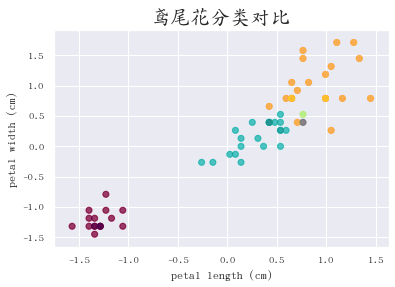

In [370]:
"""
激活	{‘identity’，‘logistic’，‘tanh’，‘relu’}，默认’relu’ 隐藏层的激活函数：‘identity’，无操作激活，对实现线性瓶颈很有用，返回f（x）= x；‘logistic’，logistic sigmoid函数，返回f（x）= 1 /（1 + exp（-x））；‘tanh’，双曲tan函数，返回f（x）= tanh（x）；‘relu’，整流后的线性单位函数，返回f（x）= max（0，x）
slover	{‘lbfgs’，‘sgd’，‘adam’}，默认’adam’。权重优化的求解器：'lbfgs’是准牛顿方法族的优化器；'sgd’指的是随机梯度下降。'adam’是指由Kingma，Diederik和Jimmy Ba提出的基于随机梯度的优化器。注意：默认解算器“adam”在相对较大的数据集（包含数千个训练样本或更多）方面在训练时间和验证分数方面都能很好地工作。但是，对于小型数据集，“lbfgs”可以更快地收敛并且表现更好。

"""
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(10),activation='relu',solver='lbfgs')
clf.fit(X_train,y_train)
#acc = clf.score(X_test,y_test)
#print('Accuracy:%.2f'%acc)
print('train accuracy: %.3f' % clf.score(X_train, y_train))
print('test accuracy: %.3f' % clf.score(X_test, y_test))

y_test_pred = clf.predict(X_test)
xf = pd.DataFrame(X_test, columns = iris.feature_names)
xf['Species'] = y_test
xf['pred']=y_test_pred
xf.head()
#xf.plot(x='petal length (cm)', y='petal width (cm)',kind='scatter',c="Species")
#xf.plot(x='petal length (cm)', y='petal width (cm)', kind='scatter',c="pred")
#plt.show()
plt.title(u'鸢尾花分类对比', fontsize=20)
plt.scatter(xf['petal length (cm)'],xf['petal width (cm)'],c=xf['Species'],cmap='hsv',alpha=0.5)
plt.scatter(xf['petal length (cm)'],xf['petal width (cm)'],c=xf['pred'],cmap='viridis',alpha=0.5)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()


/home/yakeworld/.julia/conda/3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=4, units=10)`
/home/yakeworld/.julia/conda/3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=3)`
/home/yakeworld/.julia/conda/3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Accuracy:0.93


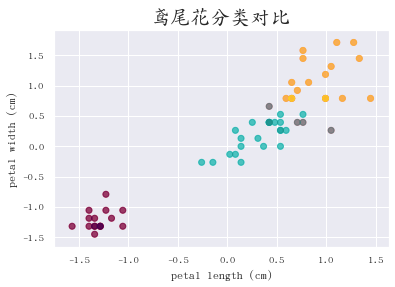

In [353]:


from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils

iris = load_iris()
#为了追求机器学习和最优化算法的最佳性能，我们将特征缩放
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X) 
X_std = std.transform(X)
#进行数据分割，测试数据占20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y,test_size=0.4, random_state= 0)


ytrain = np_utils.to_categorical(y_train) 


clf = Sequential()
clf.add(Dense(output_dim=10, input_dim=4))
#clf.add(Activation("relu"))
clf.add(Activation('sigmoid'))
clf.add(Dense(output_dim=3))
clf.add(Activation("softmax"))
#clf.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
clf.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])
#clf.fit(X_train, ytrain, nb_epoch=500, batch_size=120)
clf.fit(X_train, ytrain, nb_epoch=100, batch_size=1, verbose=0)

#clf.add(Dense(16, input_shape=(4,)))
#clf.add(Dense(output_dim=10, input_dim=4))
#clf.add(Activation('sigmoid'))
#clf.add(Dense(3))
#clf(Activation('softmax'))
#clf.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])
#clf.fit(X_train, ytrain, nb_epoch=100, batch_size=1, verbose=0)



#print('train accuracy: %.3f' % clf.score(X_train, y_train))
#print('test accuracy: %.3f' % clf.score(X_test, y_test))
y_test_pred  = clf.predict_classes(X_test, batch_size=1)

print('Accuracy:%.2f'%metrics.accuracy_score(y_test, y_test_pred))



xf = pd.DataFrame(X_test, columns = iris.feature_names)
xf['Species'] = y_test
xf['pred']=y_test_pred
xf.head()
#xf.plot(x='petal length (cm)', y='petal width (cm)',kind='scatter',c="Species")
#xf.plot(x='petal length (cm)', y='petal width (cm)', kind='scatter',c="pred")
#plt.show()
plt.title(u'鸢尾花分类对比', fontsize=20)
plt.scatter(xf['petal length (cm)'],xf['petal width (cm)'],c=xf['Species'],cmap='hsv',alpha=0.5)
plt.scatter(xf['petal length (cm)'],xf['petal width (cm)'],c=xf['pred'],cmap='viridis',alpha=0.5)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()



Accuracy:0.95


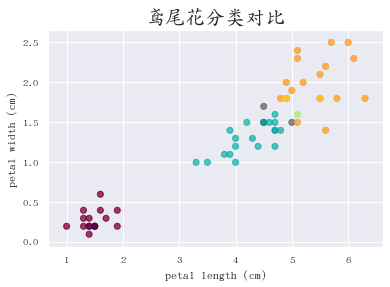

In [395]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
torch.manual_seed(1234)

iris = load_iris()
X = iris.data
y = iris.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4, random_state= 0)



#hyperparameters
hl = 10
lr = 0.01
num_epoch = 500

#build model
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(4, hl)
        self.fc2 = nn.Linear(hl, 3)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
net = Net()

#choose optimizer and loss function
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=lr)
#train
for epoch in range(num_epoch):
    X1 = Variable(torch.Tensor(X_train).float())
    Y1 = Variable(torch.Tensor(y_train).long())

    #feedforward - backprop
    optimizer.zero_grad()
    out = net(X1)
    loss = criterion(out, Y1)
    loss.backward()
    optimizer.step()

#get prediction
X2 = Variable(torch.Tensor(X_test).float())
Y2 = torch.Tensor(y_test).long()
out = net(X2)
y_test_predicted = torch.max(out.data, 1)
#get accuration
print('Accuracy:%.2f'%metrics.accuracy_score(y_test, y_test_pred))

xf = pd.DataFrame(X_test, columns = iris.feature_names)
xf['Species'] = y_test
xf['pred']=y_test_pred
xf.head()
#xf.plot(x='petal length (cm)', y='petal width (cm)',kind='scatter',c="Species")
#xf.plot(x='petal length (cm)', y='petal width (cm)', kind='scatter',c="pred")
#plt.show()
plt.title(u'鸢尾花分类对比', fontsize=20)
plt.scatter(xf['petal length (cm)'],xf['petal width (cm)'],c=xf['Species'],cmap='hsv',alpha=0.5)
plt.scatter(xf['petal length (cm)'],xf['petal width (cm)'],c=xf['pred'],cmap='viridis',alpha=0.5)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()



MLPClassifiertest accuracy: 0.967
LogisticRegressiontest accuracy: 0.967
DecisionTreeClassifiertest accuracy: 0.950
svmtest accuracy: 0.933
GaussianNBtest accuracy: 0.933


/home/yakeworld/.julia/conda/3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


LogisticRegressionCVtest accuracy: 0.933
KNeighborsClassifiertest accuracy: 0.933
Perceptrontest accuracy: 0.850


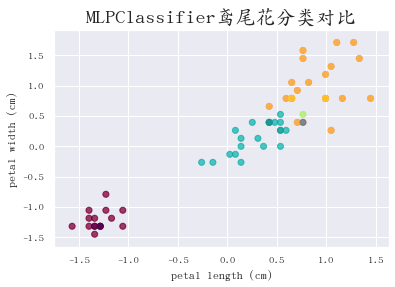

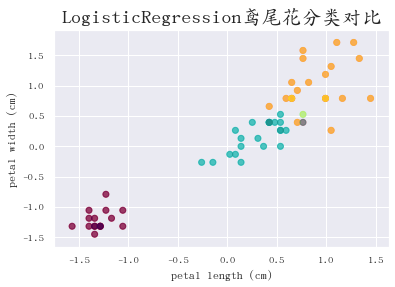

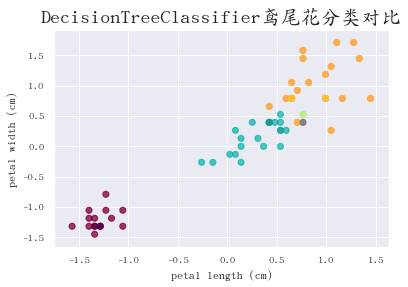

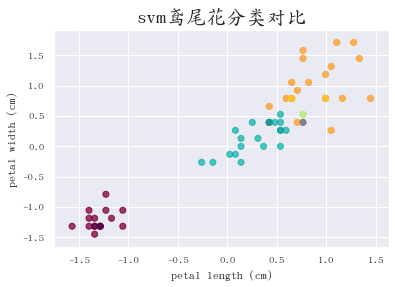

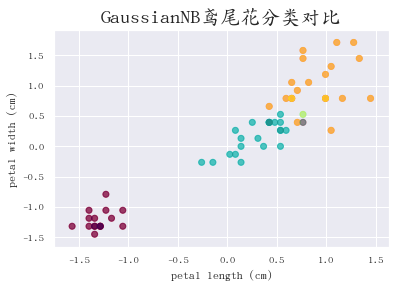

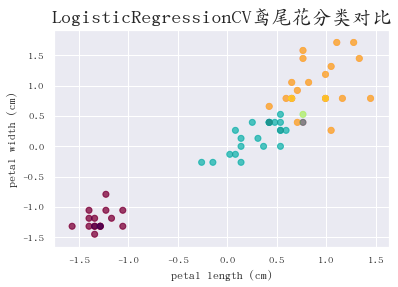

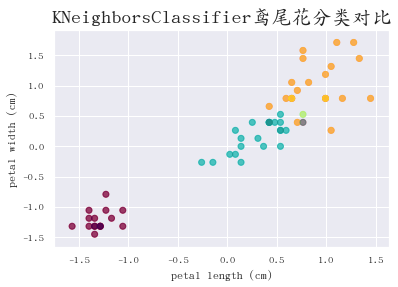

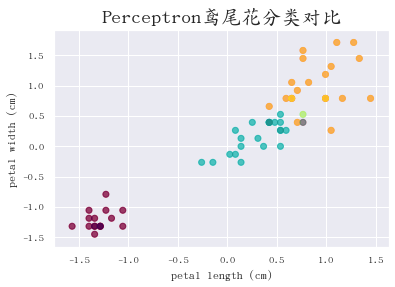

In [429]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn import svm
#from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier



iris = load_iris()
#为了追求机器学习和最优化算法的最佳性能，我们将特征缩放
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X) 
X_std = std.transform(X)
#进行数据分割，测试数据占20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y,test_size=0.4, random_state= 0)




models={
	"MLPClassifier":MLPClassifier(hidden_layer_sizes=(10),solver='lbfgs',learning_rate_init=0.01,max_iter=500),#神经网络
    "LogisticRegression": LogisticRegression(solver='lbfgs', multi_class='multinomial',C=1000.0),
    "DecisionTreeClassifier":DecisionTreeClassifier(),#决策树分析
    "svm":svm.SVC(),
    "GaussianNB":GaussianNB(),
 
    "LogisticRegressionCV":LogisticRegressionCV(Cs=np.logspace(-4,1,50), cv=3,fit_intercept=True, penalty='l2', solver='lbfgs',tol=0.01, multi_class='multinomial'),
    "KNeighborsClassifier":KNeighborsClassifier(n_neighbors=5,weights='uniform', algorithm='auto',  p=2, metric='minkowski', n_jobs=1),
    "Perceptron":Perceptron(eta0=0.1)
   # "KMeans":KMeans()
    
}

for name,clf in models.items():
    clf.fit(X_train, y_train)
    #print(name+ 'train accuracy: %.3f' % clf.score(X_train, y_train))
    print(name+ 'test accuracy: %.3f' % clf.score(X_test, y_test))
    #score=cross_validation.cross_val_score(model,x,y,cv=5).mean()
    #print(name,score)
for name,clf in models.items():
    plt.title(name+u'鸢尾花分类对比', fontsize=20)
    plt.scatter(xf['petal length (cm)'],xf['petal width (cm)'],c=xf['Species'],cmap='hsv',alpha=0.5)
    plt.scatter(xf['petal length (cm)'],xf['petal width (cm)'],c=xf['pred'],cmap='viridis',alpha=0.5)
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])
    plt.show()

In [379]:
!python -m pip  install  -i https://pypi.tuna.tsinghua.edu.cn/simple graphviz

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [335]:
import theano



In [328]:
import theano.tensor as T


In [329]:
import numpy as np


In [336]:
import lasagne

ImportError: cannot import name 'int_types' from 'lasagne.utils' (/home/yakeworld/.julia/conda/3/lib/python3.7/site-packages/lasagne/utils.py)

In [334]:
!python -m pip install -r https://raw.githubusercontent.com/Lasagne/Lasagne/master/requirements.txt

    100% |████████████████████████████████| 2.9MB 33kB/s ta 0:00:0151
  Running setup.py bdist_wheel for Theano ... done
  Stored in directory: /home/yakeworld/.cache/pip/wheels/e4/33/9d/880c86cc0db0b29d34fb6c62256322a4ea1694404192c2b408
Successfully built Theano
  Found existing installation: Theano 1.0.4
    Uninstalling Theano-1.0.4:
      Successfully uninstalled Theano-1.0.4


In [383]:
#choose optimizer and loss function
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=lr)
